This notebook explores the idea of evaluating a group of people within iSAID (the experimental "Integrated Science Assessment Information Database). iSAID gathers together a number of information sources from various data systems (all public at this point) about scientific assets of importance to our work in the USGS. We've started with our people, the most important pool of assets we have have, and will expand into other areas in due course.

The iSAID database is a cached source of information sources where we've done a little bit of work to synthesize useful information and entry points by rectifying issues with identifiers and smoothing over back-end technologies that are not very robust or stable. It is made available online to experiment what it would look like if we could tap these systems more directly and also to look at the possibility of spinning the cache up in some sort of sustainable state.

This notebook explores CDI members as a group, pulling together specific types of information that might be useful in characterizing the total strengths and potential expertise gaps within a given group of people. It exercises the iSAID database functionality built into the pylinkedcmd package against an experimental GraphQL API where recent information has been cached.

If you are running this on Google Colab or some other Jupyter Hub instance, you will need to install the following:

```!pip install git+git://github.com/skybristol/pylinkedcmd@dev```

You may also need to install wordcloud and other packages depending on the platform and environment. You will also need the Excel file ("cdi-all-200930.xlsx") dropped into the local directory or otherwise point at some other file and process out a list of email addresses.

Note: I did not go back through the full suite of email validation checks that I did in a previous version of this notebook.

In [1]:
%matplotlib inline
import pylinkedcmd
import pandas as pd
import validators
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

wc = WordCloud(
    width = 3000, 
    height = 2000, 
    random_state=1, 
    background_color='salmon', 
    colormap='Pastel1', 
    collocations=False, 
    stopwords = STOPWORDS
)

cmd_isaid = pylinkedcmd.pylinkedcmd.Isaid()

In [2]:
cdi_members = pd.read_excel("cdi-all-200930.xlsx", header=None, index_col=False)[0].to_list()
usgs_cdi_members = [i.strip().lower() for i in cdi_members if i.split("@")[-1].strip() in ["usgs.gov", "contractor.usgs.gov"]]

print(len(usgs_cdi_members), len(list(set(usgs_cdi_members))))

check_usgs_cdi_members = [(i, validators.email(i)) for i in usgs_cdi_members]
print([i for i in check_usgs_cdi_members if not i[1]])

1219 1219
[]


In [3]:
cdi_members

['aakbariasanjan@usra.edu',
 'aakobaya@usgs.gov',
 'aallwardt@usgs.gov',
 'aalorenz@usgs.gov',
 'aappling@usgs.gov',
 'aaretxabaleta@usgs.gov',
 'aaunins@usgs.gov',
 'abaker@usgs.gov',
 'abamzai@usgs.gov',
 'abcooper@usgs.gov',
 'abenthem@usgs.gov',
 'abigail.rosenberg@usmc.mil',
 'abock@usgs.gov',
 'abozimowski@usgs.gov',
 'abrayton@contractor.usgs.gov',
 'aclaycomb@usgs.gov',
 'acory@contractor.usgs.gov',
 'acronin@nsf.gov',
 'adam.smith2@canada.ca',
 'adiefenbach@usgs.gov',
 'Adrienne.stephens@aecom.com',
 'aeast@usgs.gov',
 'aecravens@usgs.gov',
 'afge3403usgs@usgs.gov',
 'afiore@usgs.gov',
 'afox@usgs.gov',
 'afriesz@contractor.usgs.gov',
 'agahala@usgs.gov',
 'agalanter@usgs.gov',
 'agarcia@usgs.gov',
 'agellis@usgs.gov',
 'agilmer@usgs.gov',
 'agrant@usgs.gov',
 'ahaj@usgs.gov',
 'aharris@usgs.gov',
 'ahbell@usgs.gov',
 'aheadman@usgs.gov',
 'ahenson@usgs.gov',
 'ahrea@usgs.gov',
 'ahudson@usgs.gov',
 'aikatz@usgs.gov',
 'ajanetos@contractor.usgs.gov',
 'ajason@usgs.gov',
 'ajly

In [4]:
cdi_members = cmd_isaid.assemble_person_record(cdi_members, datatypes=["sb_usgs_staff","identified_expertise"])

In [5]:
cdi_job_titles = [i["jobtitle"] for i in cdi_members["ScienceBase Directory"] if i["jobtitle"] is not None]
cdi_expertise_terms = [i["term"] for i in cdi_members["USGS Profile Expertise"] if i["term"] is not None]
print("Number of unique or shared job titles: ", len(list(set(cdi_job_titles))))
print("Number of unique or shared expertise terms: ", len(list(set(cdi_expertise_terms))))

Number of unique or shared job titles:  356
Number of unique or shared expertise terms:  1488


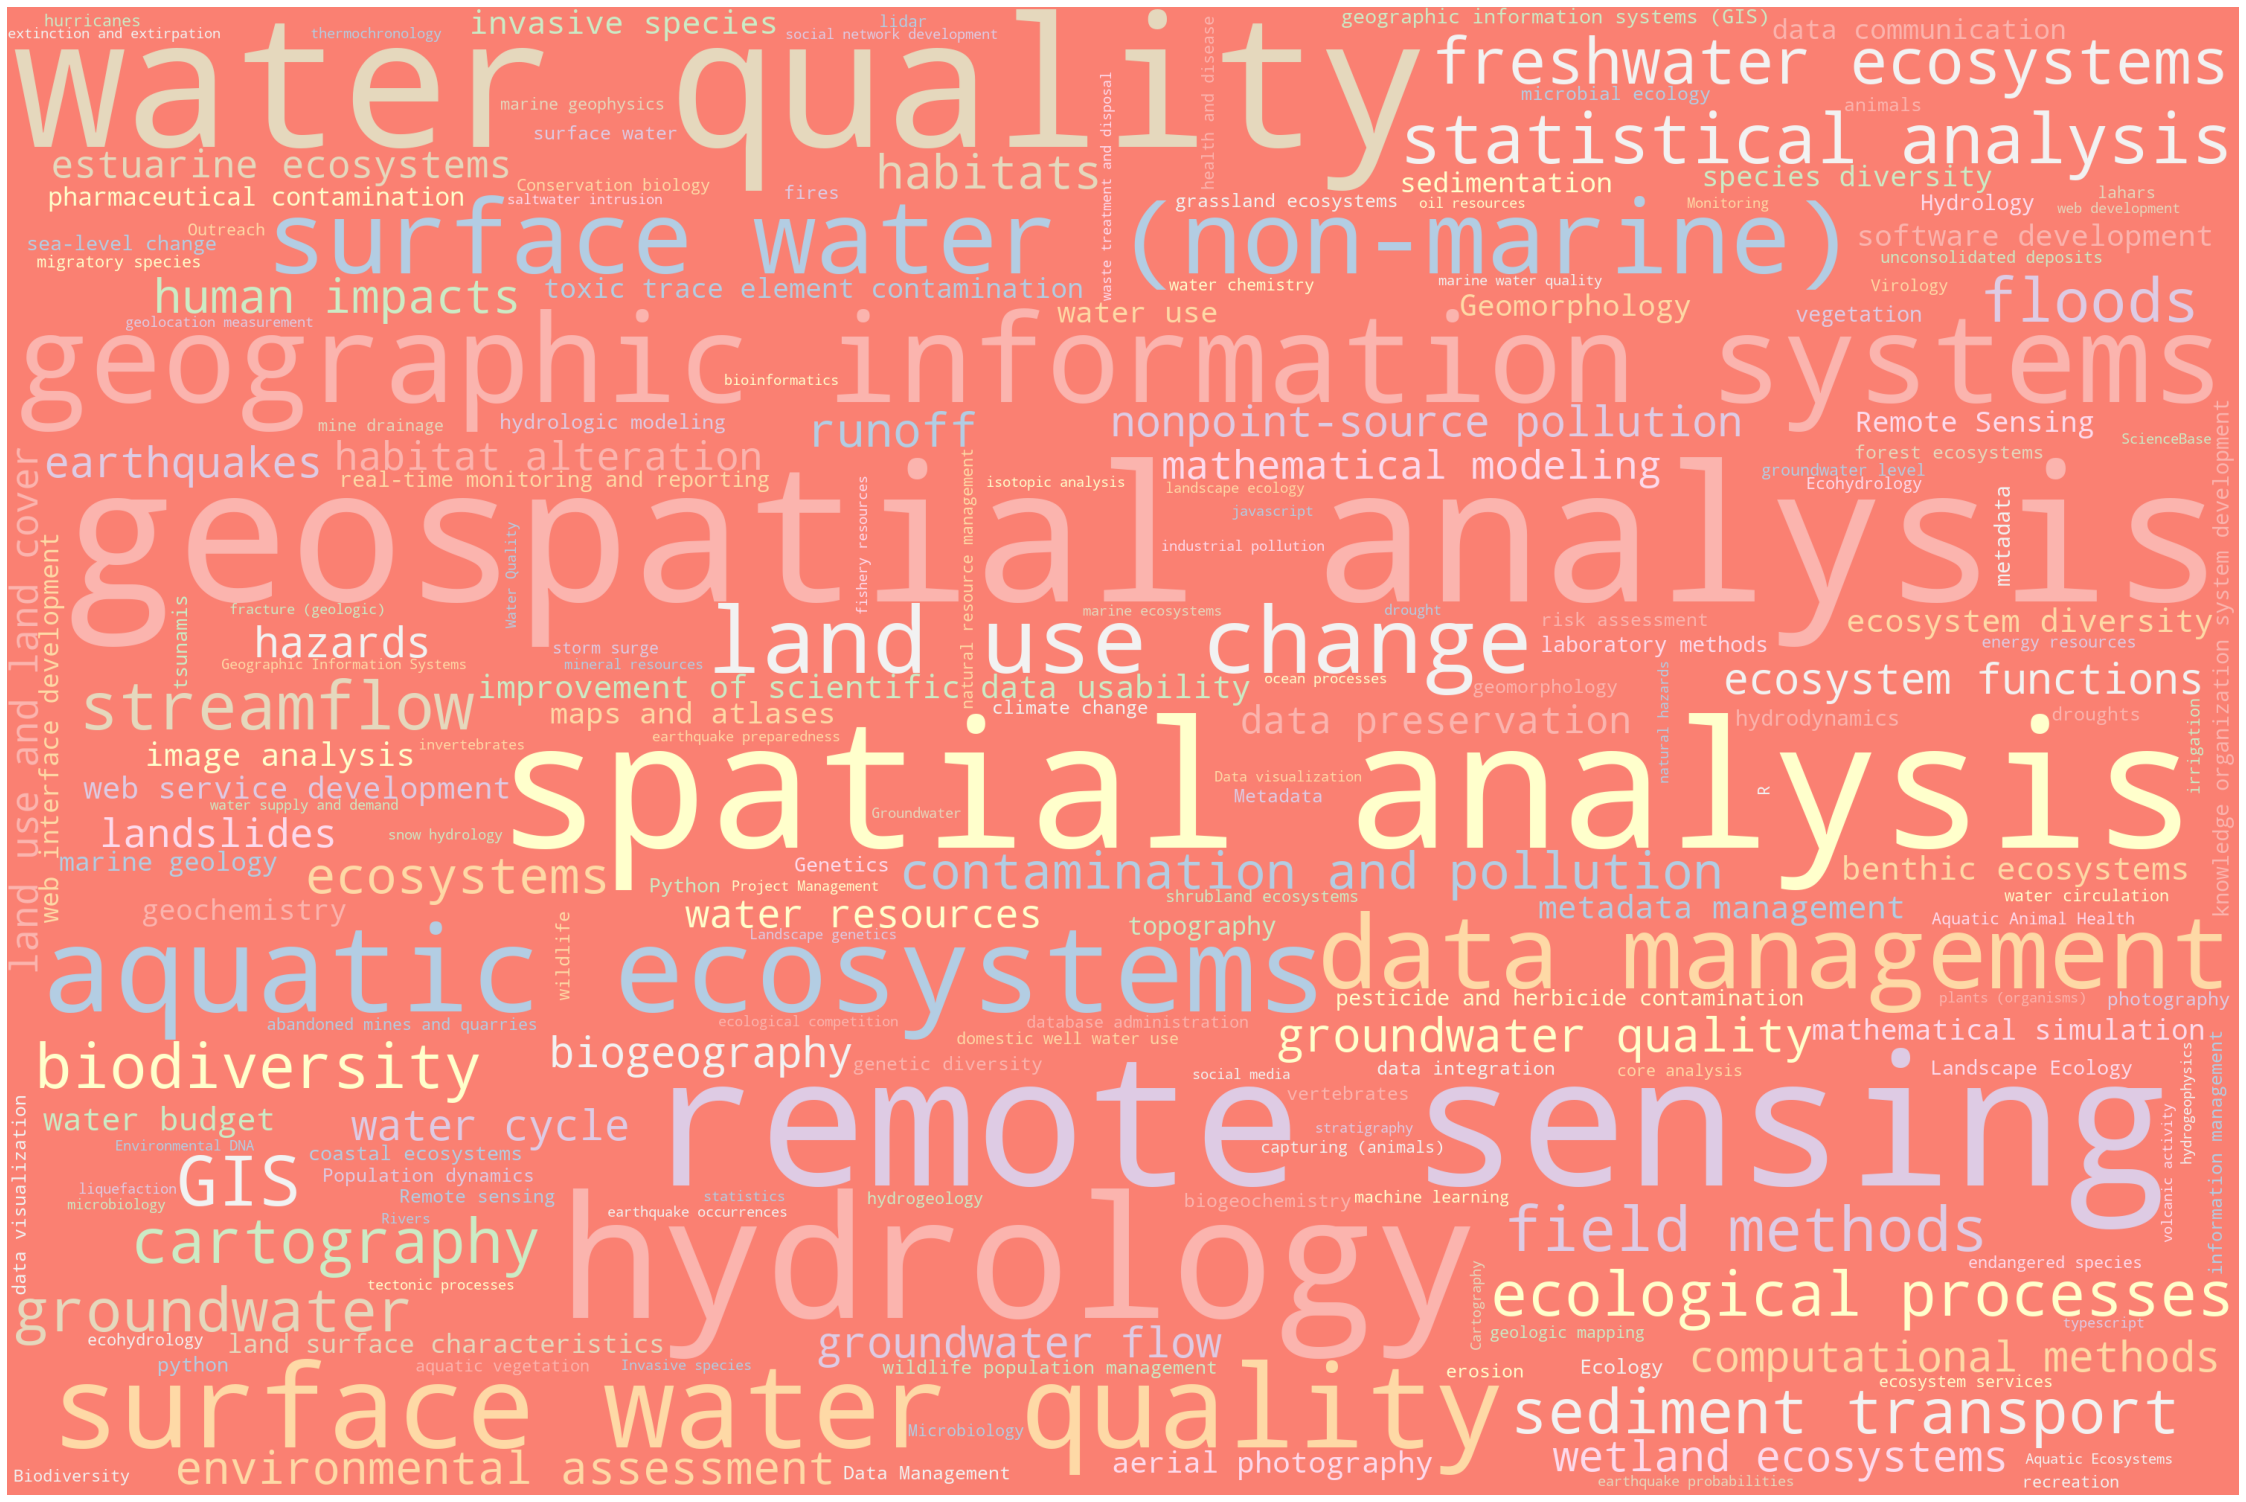

In [6]:
plot_cloud(wc.generate_from_frequencies(Counter(cdi_expertise_terms)))

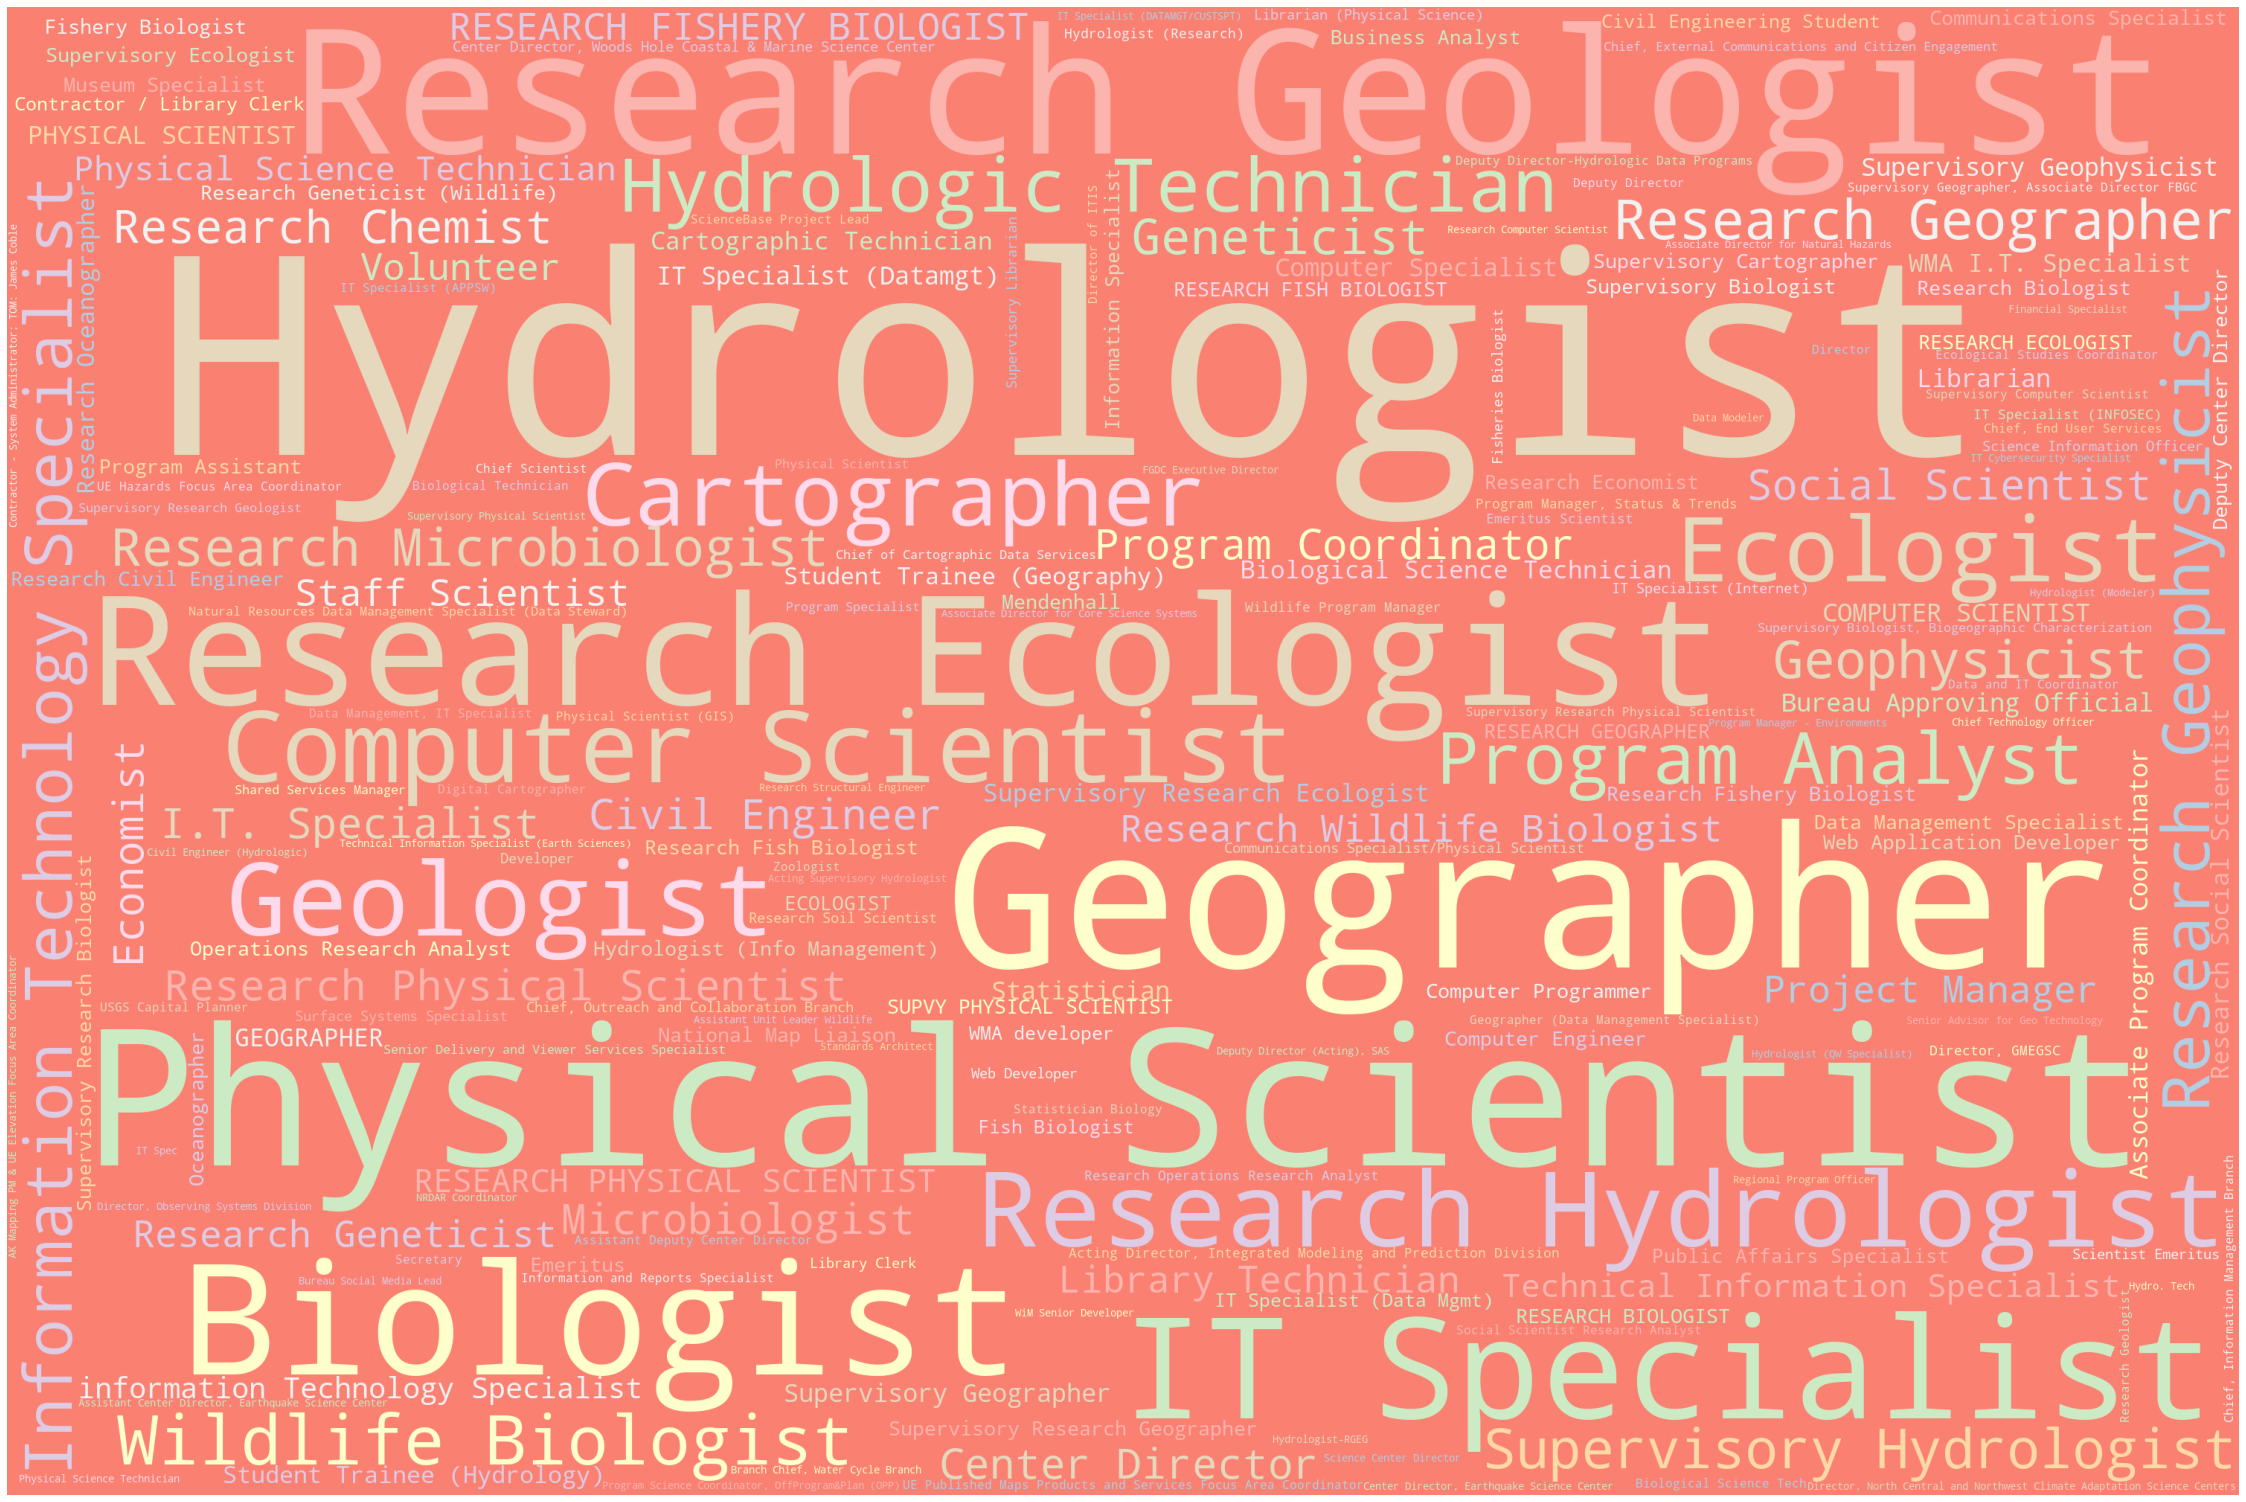

In [7]:
plot_cloud(wc.generate_from_frequencies(Counter(cdi_job_titles)))